In [66]:
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
import json

In [67]:
x_train = np.load('data/x_train.npy')
y_train = np.load('data/y_train.npy')
x_test = np.load('data/x_test.npy')
y_test = np.load('data/y_test.npy')

In [68]:
model = load_model('models/model3.tf')

2022-02-02 14:32:01.510437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 14:32:01.514429: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 14:32:03.536090: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-02 14:32:03.541769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [69]:
y_pred = model.predict(x_test).numpy()

2022-02-02 14:32:04.882960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [70]:
y_pred = np.array([np.max(probs[:, 0]) for probs in y_pred])

In [71]:
def evaluate(y_true, y_pred, thresh):
    y_pred_ = (y_pred > thresh).astype(int)
    return accuracy_score(y_true, y_pred_), y_pred_

In [72]:
best_thresh = 0
best_accuracy = 0

for i in np.arange(0, 1, 0.01):
    print(f'Calculating thresh: {i}')
    score, _ = evaluate(y_test, y_pred, i)
    print(f'Accuracy: {score}')
    if score > best_accuracy:
        best_accuracy = score
        best_thresh = i

Calculating thresh: 0.0
Accuracy: 0.4141856392294221
Calculating thresh: 0.01
Accuracy: 0.4141856392294221
Calculating thresh: 0.02
Accuracy: 0.4141856392294221
Calculating thresh: 0.03
Accuracy: 0.4141856392294221
Calculating thresh: 0.04
Accuracy: 0.4141856392294221
Calculating thresh: 0.05
Accuracy: 0.4141856392294221
Calculating thresh: 0.06
Accuracy: 0.4141856392294221
Calculating thresh: 0.07
Accuracy: 0.4141856392294221
Calculating thresh: 0.08
Accuracy: 0.4141856392294221
Calculating thresh: 0.09
Accuracy: 0.4141856392294221
Calculating thresh: 0.1
Accuracy: 0.4141856392294221
Calculating thresh: 0.11
Accuracy: 0.4141856392294221
Calculating thresh: 0.12
Accuracy: 0.4141856392294221
Calculating thresh: 0.13
Accuracy: 0.4141856392294221
Calculating thresh: 0.14
Accuracy: 0.4141856392294221
Calculating thresh: 0.15
Accuracy: 0.4141856392294221
Calculating thresh: 0.16
Accuracy: 0.4141856392294221
Calculating thresh: 0.17
Accuracy: 0.4141856392294221
Calculating thresh: 0.18
Accur

In [73]:
score, y_pred = evaluate(y_test, y_pred, best_thresh)
print(score)

0.7701401050788091


600 epochs: 0.7661996497373029
800 epochs: 0.7574430823117339
700 epochs: 0.7701401050788091
1000 epochs: 0.7701401050788091

In [74]:
y_pred_train = model.predict(x_train).numpy()
y_pred_train = np.array([np.max(probs[:, 0]) for probs in y_pred_train])
evaluate(y_train, y_pred_train, best_thresh)

(0.8119722274347908, array([0, 0, 0, ..., 0, 0, 0]))

In [75]:
confusion_matrix(y_test, y_pred)

array([[1123,  215],
       [ 310,  636]])

In [76]:
with open('models/history3.json', 'r') as f:
    history = json.load(f)

In [77]:
print(history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


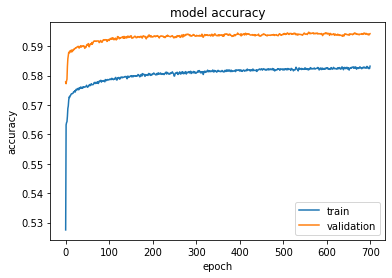

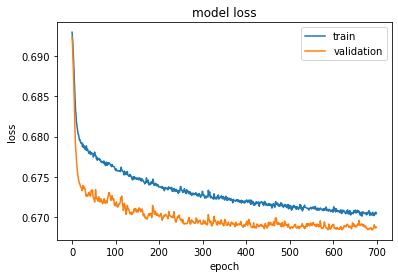

In [78]:
plt.subplots()
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

plt.subplots()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()